In [1]:
# import zipfile

# def unzip_file(zip_filepath, dest_dir):
#     with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
#         zip_ref.extractall(dest_dir)

In [2]:
# unzip_file(zip_filepath='../zipdata/nbac_1986_to_2021_20220624.zip', dest_dir='../data')

In [3]:
# for year in range(1986, 2021):
#     unzip_file(zip_filepath=f'../zipdata/nbac_{year}_r9_20210810.zip', dest_dir='../data')

In [4]:
# unzip_file(zip_filepath=f'../zipdata/nbac_2021_r9_20220624.zip', dest_dir='../data')

In [5]:
import geopandas as gpd

In [6]:
# replace 'shapefile' with the name of your actual file (without extension)
data = gpd.read_file('../data/nbac_1986_to_2021_20220624.shp')

In [7]:
# This will print the first few rows of your data.
data.head()

,YEAR,NFIREID,BASRC,FIREMAPS,FIREMAPM,FIRECAUS,BURNCLAS,SDATE,EDATE,AFSDATE,AFEDATE,CAPDATE,POLY_HA,ADJ_HA,ADJ_FLAG,AGENCY,BT_GID,VERSION,COMMENTS,geometry
0,1986.0,208.0,1.0,9.0,7.0,2.0,4.0,NaN,NaN,1986-07-10,NaN,1986-09-12,3408.092664,3408.092664,0.0,NT,12.0,1986_r9_20210810,Null,"POLYGON ((-1409877.875 1922967.375, -1409851.5..."
1,1986.0,31.0,1.0,9.0,7.0,4.0,4.0,NaN,NaN,1986-05-14,NaN,1986-06-20,2767.768044,2767.768044,0.0,NB,8.0,1986_r9_20210810,Null,"POLYGON ((2168531.000 357519.563, 2168557.000 ..."
2,1986.0,159.0,3.0,0.0,2.0,4.0,4.0,NaN,NaN,1986-05-28,NaN,NaN,49.268235,53.316641,2.0,BC,241.0,1986_r9_20210810,"G70001[load_date:20070517000000,method:digitis...","POLYGON ((-1544570.746 1040207.707, -1544573.7..."
3,1986.0,102.0,3.0,0.0,2.0,4.0,4.0,NaN,NaN,1986-10-20,NaN,NaN,6.743968,7.880180,2.0,BC,269.0,1986_r9_20210810,"C50101[load_date:20070517000000,method:digitis...","POLYGON ((-1886518.162 724938.138, -1886574.77..."
4,1986.0,13.0,1.0,9.0,7.0,2.0,4.0,NaN,NaN,1986-05-27,NaN,1986-07-30,1882.734463,1882.734463,0.0,QC,17.0,1986_r9_20210810,Null,"MULTIPOLYGON (((1339406.750 269544.313, 133941..."


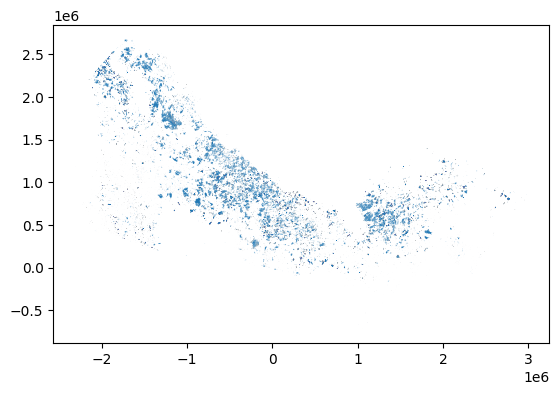

In [8]:
import matplotlib.pyplot as plt

# Plot the data
data.plot()

# Show the plot
plt.show()

In [9]:
import contextily as ctx

# Ensure data is in web mercator projection
data = data.to_crs(epsg=3857)

# Create a plot
ax = data.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Add basemap with contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Show the plot
plt.show()

In [10]:
import streamlit as st
import pydeck as pdk

In [11]:
# Get the geometry as (longitude, latitude) pairs
data['lon'] = data['geometry'].x
data['lat'] = data['geometry'].y

# Create a map
st.pydeck_chart(pdk.Deck(
    map_style='mapbox://styles/mapbox/light-v9',
    initial_view_state=pdk.ViewState(
        latitude=data['lat'].mean(),
        longitude=data['lon'].mean(),
        zoom=11,
        pitch=50,
    ),
    layers=[
        pdk.Layer(
            'ScatterplotLayer',
            data=data,
            get_position='[lon, lat]',
            get_radius=1000,
            get_fill_color=[180, 0, 200, 140],
        ),
    ],
))

ValueError: x attribute access only provided for Point geometries